# Example 5: Electron transfer rates from DFT calculations

In this example, we will use the DonorAcceptor module together with NWChem outputs to calculate the rate of electron transfer between two indole molecules 


<div>
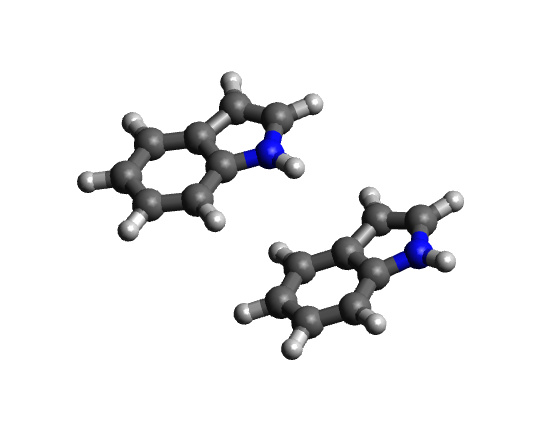
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vibron.nwchem_utils import nwread, nwdushinsky
from vibron import DonorAcceptor
from vibron.utils import units

First, we extract the molecular vibrational modes and calculate the Huang-Rhys parameters for a neutral-to-anion transition.

Text(0, 0.5, 'DFT HR parameters')

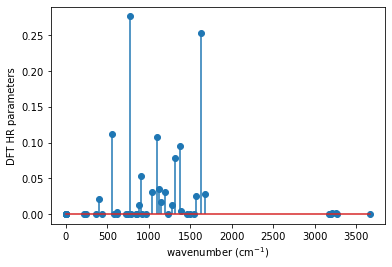

In [2]:
vib_modes = nwread.read_frequencies('./nwchem_outs/neutral_indole.out')
HR_parameters = nwdushinsky.huang_rhys('./nwchem_outs/neutral_indole.out','./nwchem_outs/anion_indole.out')

plt.stem(vib_modes * units.eV2wavenumber,HR_parameters,use_line_collection=True)
plt.xlabel('wavenumber (cm$^{-1}$)')
plt.ylabel('DFT HR parameters')

We can set other parameters as follows

In [3]:
V = 2e-3 # coupling in eV
deltaE = 0 # driving force
temp_K = 296 #temperature in K
w_cut = 0.04 # phonon bath cut-off frequency

lambda_o = np.linspace(0.1,1.0,10) # outer-sphere reorganization in eV

We then create the DonorAcceptor object. We will assume that the neutral and anionic species have the same vibrational modes and that anion-to-neutral and neutral-to-anion transitions have the same Huang-Rhys parameters.

In [4]:
Indoles = DonorAcceptor(V=V, deltaE=0, temp_K=temp_K, w_cut = w_cut)
Indoles.vib_modes_A = vib_modes
Indoles.hr_parameters_A = HR_parameters
Indoles.vib_modes_D = vib_modes
Indoles.hr_parameters_D = HR_parameters


We will calculate the electron transfer rate as a function of the outer-sphere reorganization energy (which can be tuned for instance by varying the solvent).

We will use three theoretical frameworks:

(i) Marcus theory which incorporates the molecular modes into the outer-sphere coupling and treats them on the same (classical) footing

(ii) Multimode Marcus-Levich-Jortner theory which treats the molecular vibrational modes quantum-mechanically but models the outer-sphere environment classically

(iii) The full Fermi golden rule theory which treats the entire vibrational environment quantum-mechanically (here, assuming that the outer-sphere can be represented by an ohmic spectral density)

In [5]:
marcus = []
mmlj = []
fgr = []

for lambd in lambda_o:
    
    Indoles.lambda_o = lambd
    
    fgr.append( Indoles.fgr_ohmic() )
    marcus.append( Indoles.marcus() )
    mmlj.append( Indoles.mlj_multi() )


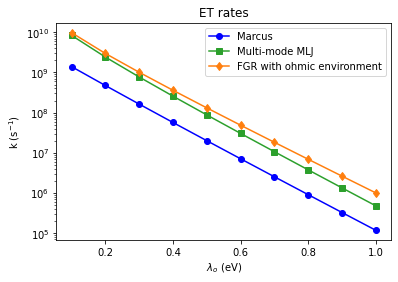

In [6]:
plt.semilogy(lambda_o, marcus, label='Marcus',color='blue',marker='o')
plt.semilogy(lambda_o, mmlj, label='Multi-mode MLJ',color='tab:green',marker='s')
plt.semilogy(lambda_o, fgr, label='FGR with ohmic environment',color='tab:orange',marker='d')

plt.title('ET rates')
plt.xlabel('$\lambda_o$ (eV)')
plt.ylabel('k (s$^{-1}$)')
plt.legend()